## Import Library

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input
from keras.models import Model
from keras.layers import Concatenate
from tensorflow.keras import layers, optimizers, datasets
from keras_preprocessing.image import ImageDataGenerator

import os
import cv2
from sklearn import preprocessing
from pathlib import Path
import splitfolders

import shutil

## Data Collecting

### Membuat data Validation dari data train & test

In [2]:
srcPath = 'fingers/train/' 
destPath = 'fingers/validation/' 
files = os.listdir(srcPath)

for file in files[:1800]:
    shutil.move(srcPath + file, destPath + file)

In [ ]:
srcPath1 = 'fingers/test/' 
destPath1 = 'fingers/validation/' 
files1 = os.listdir(srcPath1)

for file1 in files1[:1800]:
    shutil.move(srcPath1 + file1, destPath1 + file1)

## Reading Data 

In [31]:
# Membaca Data Train Gambar
train_path = []
label_train = []

path_train = "fingers/train/"

for filename in os.listdir(path_train):
    
    train_path.append(path_train+filename)
    whole_label = filename.split('_')[1]
    useful_label = whole_label.split('.')[0]
    label_train.append(useful_label)

print("Jumlah Gambar Data Train: ", len(train_path))
print("6 Label Pertama: ", label_train[:6])


dims_train = []  
# membaca data gambar test data
for path in train_path:
    
    image = cv2.imread(path)           
    dims_train.append(image)
    
dims_train = np.array(dims_train)
print("Bentuk Dimensi Data train: ", dims_train.shape)

Jumlah Gambar Data Train:  16200
6 Label Pertama:  ['1L', '0L', '5L', '1R', '0R', '4L']
Bentuk Dimensi Data train:  (16200, 128, 128, 3)


In [32]:
# Membaca Data Test Gambar 
test_path = []
label_test = []

path_test = "fingers/test/"

for filename in os.listdir(path_test):
    
    test_path.append(path_test+filename)
    whole_label = filename.split('_')[1]
    useful_label = whole_label.split('.')[0]
    label_test.append(useful_label)

print("Jumlah Gambar Data Test: ", len(test_path))
print("6 Label Pertama: ", label_test[:6])



dims_test = []  
# membaca data gambar test data
for path in test_path:
    
    image = cv2.imread(path)           
    dims_test.append(image)
    
dims_test = np.array(dims_test)
print("Bentuk Dimensi Data test: ", dims_test.shape)


Jumlah Gambar Data Test:  1800
6 Label Pertama:  ['2R', '4R', '3L', '1R', '5L', '4L']
Bentuk Dimensi Data test:  (1800, 128, 128, 3)


In [33]:
# Membaca Data Validation Gambar 
val_path = []
label_val = []

path_val = "fingers/validation/"

for filename in os.listdir(path_val):
    
    val_path.append(path_val+filename)
    whole_label = filename.split('_')[1]
    useful_label = whole_label.split('.')[0]
    label_val.append(useful_label)

print("Jumlah Gambar Data Validation: ", len(val_path))
print("6 Label Pertama: ", label_val[:6])

dims_val = []  
# membaca data gambar test data
for path in val_path:
    
    image = cv2.imread(path)           
    dims_val.append(image)
    
dims_val = np.array(dims_val)
print("Bentuk Dimensi Data train: ", dims_val.shape)

Jumlah Gambar Data Validation:  4118
6 Label Pertama:  ['0L', '0L', '2L', '0L', '5L', '5L']
Bentuk Dimensi Data train:  (4118, 128, 128, 3)


## Visualisasi Dataset 

### Memeriksa gambar pertama milik folder data train yg di clean 

In [34]:
train_path[0]

'fingers/train/2956811a-7483-4ff6-8cc0-535297d7aefe_1L.png'

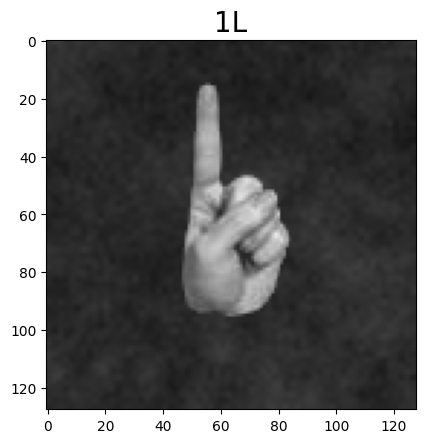

In [35]:
image = cv2.imread(train_path[0]) 

plt.imshow(image)
plt.title(label_train[0], fontsize = 20)
plt.axis('on')
plt.show()

### Memeriksa gambar milik folder data test

In [36]:
test_path[100]

'fingers/test/87bdc42d-9525-4582-b579-187c0da9491b_3L.png'

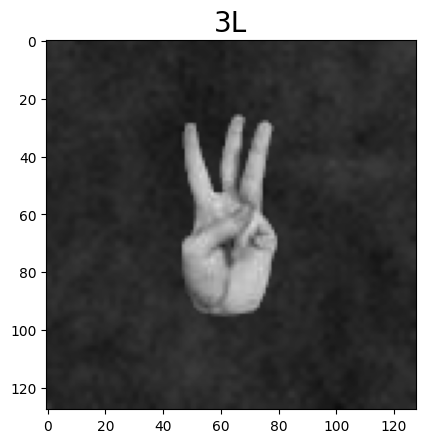

In [37]:
image = cv2.imread(test_path[100]) 

plt.imshow(image)
plt.title(label_test[100], fontsize = 20)
plt.axis('on')
plt.show()

### Contoh gambar milik data validation

In [38]:
val_path[200]

'fingers/validation/0236c944-6677-42c0-b9c2-c9bf7b267bec_0R.png'

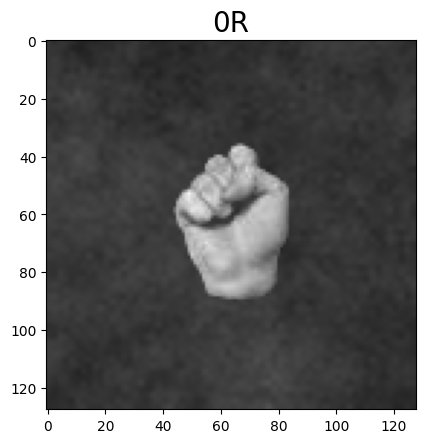

In [39]:
image = cv2.imread(val_path[200]) 

plt.imshow(image)
plt.title(label_val[200], fontsize = 20)
plt.axis('on')
plt.show()

### Visualisasi Data Sample Train

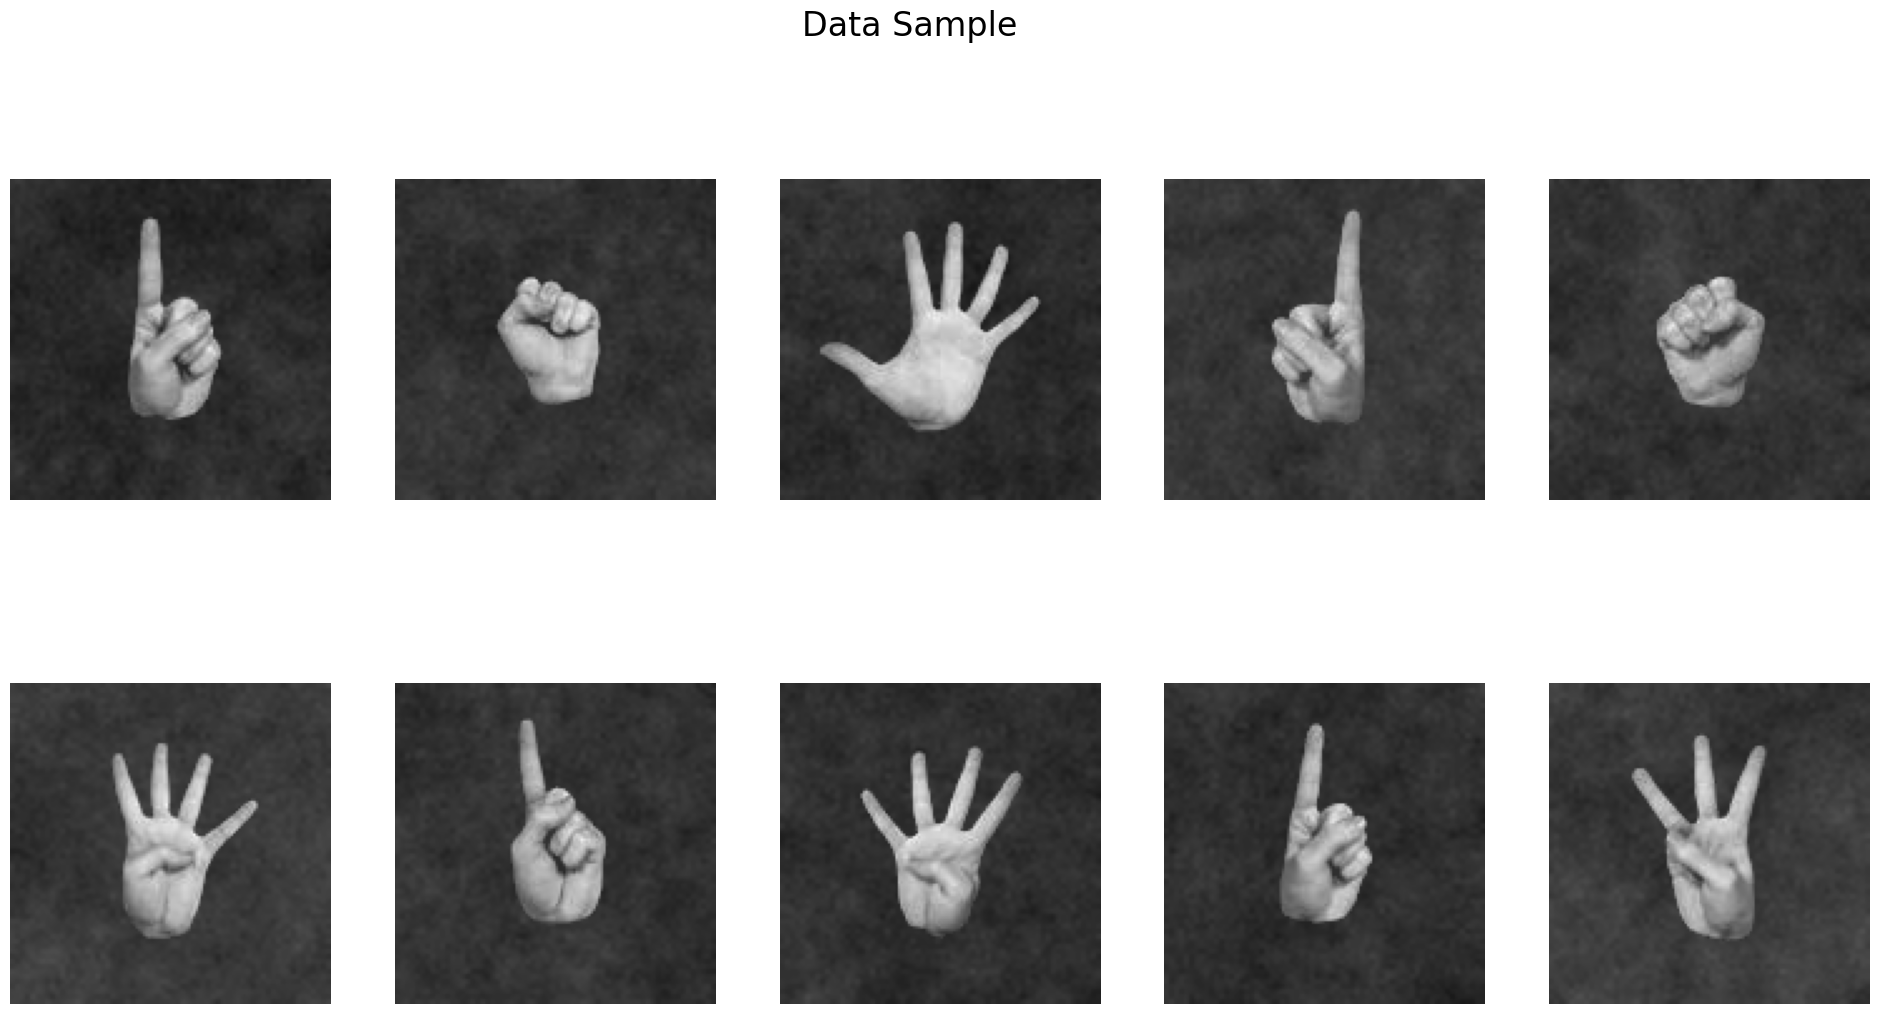

In [40]:
fig, axs= plt.subplots(2,5, figsize=[24,12])

count=0
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(train_path[count])
    
        axs[i][j].imshow(img)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("Data Sample", fontsize = 24)        
plt.show()

## Augmentasi (Data Preprocessing)

### Menyimpan dataset yang akan digunakan

In [41]:
train = os.listdir('fingers/train/')
test = os.listdir('fingers/test/')
val = os.listdir('fingers/validation/')

all_train = ['fingers/train/' + i for i in train]
all_test = ['fingers/test/' + i for i in test]
all_val = ['fingers/validation/' + i for i in val]

In [42]:
train_df = pd.DataFrame(all_train, columns=['Filepath'])
test_df = pd.DataFrame(all_test, columns=['Filepath'])
val_df = pd.DataFrame(all_val, columns=['Filepath'])

train_df.head()

,Filepath
0,fingers/train/2956811a-7483-4ff6-8cc0-535297d7...
1,fingers/train/2956fbe3-6ea6-457b-bf9f-13e3ce2c...
2,fingers/train/295a0fba-e11d-4fa5-bc15-e8718058...
3,fingers/train/295b8556-9554-411a-b28c-c7e0383b...
4,fingers/train/29643341-2f74-4593-b90c-e56760ce...


In [43]:
train_df['Label'] = train_df['Filepath'].apply(lambda a: a[-6:-4])
test_df['Label'] = test_df['Filepath'].apply(lambda a: a[-6:-4])
val_df['Label'] = val_df['Filepath'].apply(lambda a: a[-6:-4])

train_df.head()

,Filepath,Label
0,fingers/train/2956811a-7483-4ff6-8cc0-535297d7...,1L
1,fingers/train/2956fbe3-6ea6-457b-bf9f-13e3ce2c...,0L
2,fingers/train/295a0fba-e11d-4fa5-bc15-e8718058...,5L
3,fingers/train/295b8556-9554-411a-b28c-c7e0383b...,1R
4,fingers/train/29643341-2f74-4593-b90c-e56760ce...,0R


### Membuat datagen untuk mendeklarasikan ImageDataGenerator

In [44]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    shear_range=.2,
    zoom_range=.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=.2,
    zoom_range=.2,
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

### Kemudian ambil dataset melalui datagen yang telah dibuat

In [45]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(50, 50),
    shuffle=True,
    batch_size=4,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(50, 50),
    shuffle=True,
    batch_size=2,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(50, 50),
    shuffle=True,
    batch_size=2,
    class_mode='categorical'
)

Found 16200 validated image filenames belonging to 12 classes.
Found 1800 validated image filenames belonging to 12 classes.
Found 4118 validated image filenames belonging to 12 classes.


In [46]:
image, label = train_generator.next()

In [47]:
print(image)
print(label)

[[[[0.16856965 0.16856965 0.16856965]
   [0.15312417 0.15312417 0.15312417]
   [0.15472478 0.15472478 0.15472478]
   ...
   [0.21974029 0.21974029 0.21974029]
   [0.2206795  0.2206795  0.2206795 ]
   [0.2155561  0.2155561  0.2155561 ]]

  [[0.18250091 0.18250091 0.18250091]
   [0.15033792 0.15033792 0.15033792]
   [0.1561179  0.1561179  0.1561179 ]
   ...
   [0.21608837 0.21608837 0.21608837]
   [0.21363081 0.21363081 0.21363081]
   [0.22558543 0.22558543 0.22558543]]

  [[0.19069436 0.19069436 0.19069436]
   [0.15635939 0.15635939 0.15635939]
   [0.15556622 0.15556622 0.15556622]
   ...
   [0.22434346 0.22434346 0.22434346]
   [0.23629807 0.23629807 0.23629807]
   [0.24567069 0.24567069 0.24567069]]

  ...

  [[0.20508508 0.20508508 0.20508508]
   [0.20850068 0.20850068 0.20850068]
   [0.21168894 0.21168894 0.21168894]
   ...
   [0.18102139 0.18102139 0.18102139]
   [0.17761612 0.17761612 0.17761612]
   [0.17990512 0.17990512 0.17990512]]

  [[0.21156143 0.21156143 0.21156143]
   [0.2

### Visualisasi Data Gambar Augmentasi

In [48]:
labels = [
    '0L', '0R', '1L', '1R', '2L', '2R', '3L', '3R', '4L', '4R', '5L', '5R',
]

In [49]:
len(image)

4

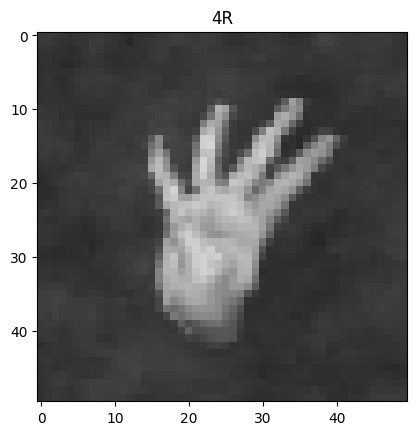

In [50]:
data = 2
plt.imshow(image[data])
plt.title(labels[tf.argmax(label[data])])
plt.show()

### Normalisasi Data Test

In [51]:

X_test = []


    
# membaca data gambar test data
for path in test_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (50,50))    
    X_test.append(image)
    



X_test = np.array(X_test)

### Menampilkan dimensi data Test Normalisasi

In [52]:

print("Bentuk X_test: ", X_test.shape)


Bentuk X_test:  (1800, 50, 50, 3)


### Encoding Data Test 

In [53]:
# Encoding Label dan menkonversi ke nilai kategorikal
lable_encoder = preprocessing.LabelEncoder()
y_test_temp = lable_encoder.fit_transform(label_test)

print("Nilai Encoding test: ", y_test_temp)

Nilai Encoding test:  [5 9 6 ... 9 7 7]


In [54]:
# Encoding data menggunakan keras utils
y_test = keras.utils.to_categorical(y_test_temp, 12)

print("Nilia Ctegorical  y_test:", y_test, "\n")

Nilia Ctegorical  y_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 



## Model

### Membuat Sequential Model

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', input_shape=(50, 50, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(12, activation='softmax')
])

### Mengcompile model

In [56]:
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)       

### Model fitting

In [57]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience=5,
)

In [58]:
history = model.fit(
    train_generator,
    # batch_size=128,
    epochs=10,
    # shuffle=True,
    validation_data=val_generator,
    verbose =1,
    callbacks=[earlyStopping]
    # (X_val, y_val)
)

Epoch 1/10
4050/4050 [==============================] - 136s 33ms/step - loss: 0.2436 - accuracy: 0.9149 - val_loss: 0.0227 - val_accuracy: 0.9934
Epoch 2/10
4050/4050 [==============================] - 139s 34ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0285 - val_accuracy: 0.9896
Epoch 3/10
4050/4050 [==============================] - 140s 35ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0095 - val_accuracy: 0.9964
Epoch 4/10
4050/4050 [==============================] - 144s 35ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0357 - val_accuracy: 0.9842
Epoch 5/10
4050/4050 [==============================] - 144s 35ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0023 - val_accuracy: 0.9990
Epoch 6/10
4050/4050 [==============================] - 143s 35ms/step - loss: 0.0166 - accuracy: 0.9959 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 7/10
4050/4050 [==============================] - 143s 35ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0

### Visualisasi Model

In [59]:
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']


y_loss_train =history.history['loss']
y_loss_val =history.history['val_loss']

x_=range(len(y_acc_train))

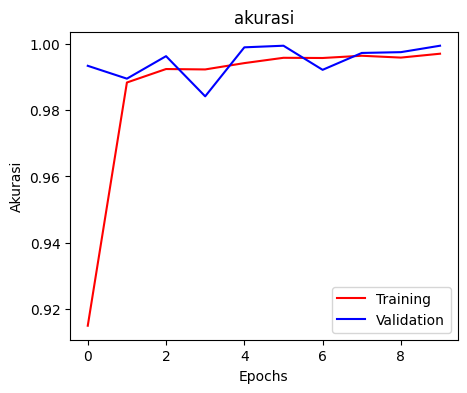

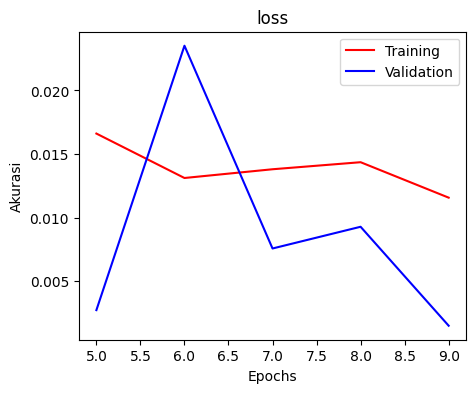

In [60]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acc_train, c='r',label='Training')
plt.plot(x_, y_acc_val, c='b',label='Validation')
plt.title('akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()


plt.figure(2, figsize=(5,4))
plt.plot(x_[5:], y_loss_train[5:], c='r',label='Training')
plt.plot(x_[5:], y_loss_val[5:], c='b',label='Validation')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

### Evaluasi

In [61]:
model.evaluate(test_generator)

900/900 [==============================] - 5s 6ms/step - loss: 3.9619e-05 - accuracy: 1.0000


[3.9619353628950194e-05, 1.0]

### Menyimpan hasil prediksi

In [62]:
pred = model.predict(X_test)
print(pred)

57/57 [==============================] - 3s 46ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
model.save('D:\semester 5\Praktikum KB\PA_KB\PA_KB_3_A1')

INFO:tensorflow:Assets written to: D:\semester 5\Praktikum KB\PA_KB\PA_KB_3_A1\assets


INFO:tensorflow:Assets written to: D:\semester 5\Praktikum KB\PA_KB\PA_KB_3_A1\assets


### Labelling gambar hasil prediksi

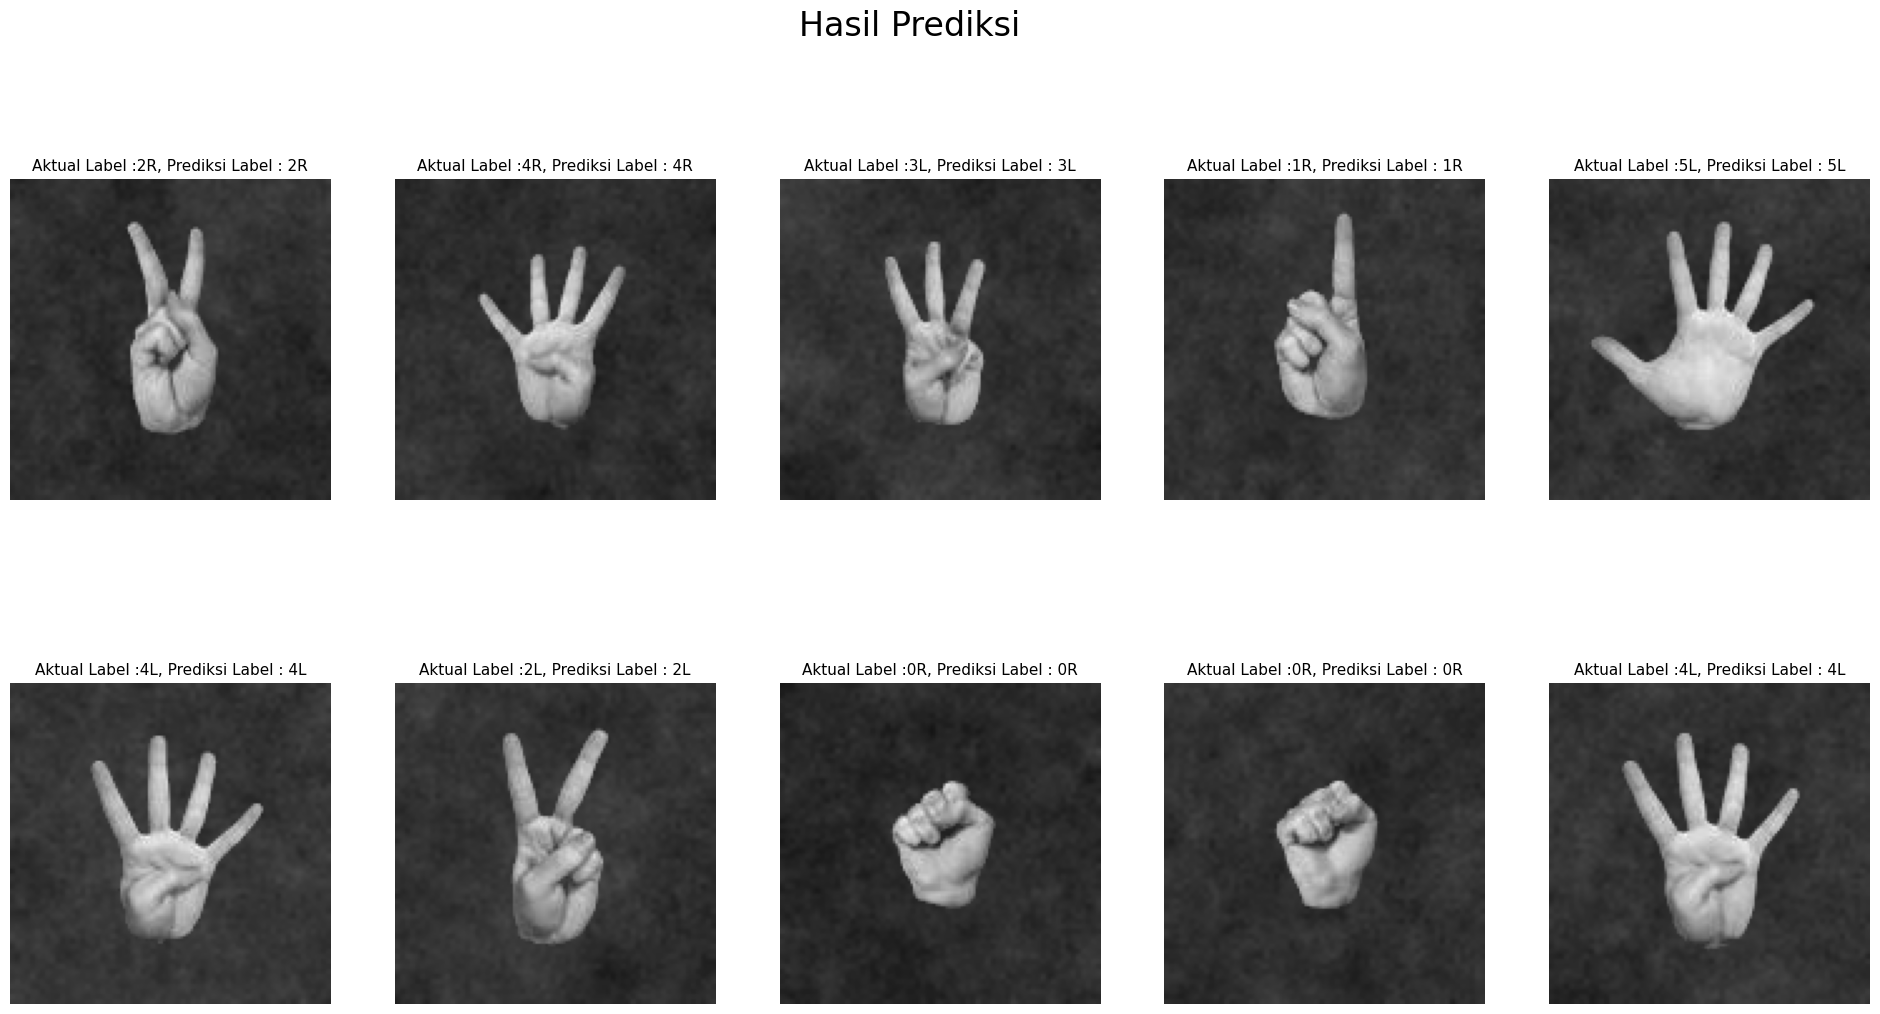

In [64]:
fig, axs= plt.subplots(2,5, figsize=[24,12])


count=0
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(test_path[count])
        
        results = np.argsort(pred[count])[::-1]
      
        labels = lable_encoder.inverse_transform(results) #label prediksi
        
        ActualLabel = np.argsort(y_test[count])[::-1]
        Aclabels = lable_encoder.inverse_transform(ActualLabel)#label prediksi
        
        axs[i][j].imshow(img)
        axs[i][j].set_title(f"Aktual Label :{Aclabels[0]}, Prediksi Label : {labels[0]}",fontsize = 11)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("Hasil Prediksi", fontsize = 24)        
plt.show()